In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix, plot_confusion_matrix

In [2]:
creditcard = 'G:/creditcard.csv'


In [3]:
# Read the dataset 
df = pd.read_csv(creditcard)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [7]:
# Check the distribution of the credit card fraud cases 
class_proportion = df['Class'].value_counts()
class_proportion

0    284315
1       492
Name: Class, dtype: int64

<ipython-input-8-500933463896>:19: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(handles, labels=['0: Legitimate', '1: Fraudulent'], prop= font3,


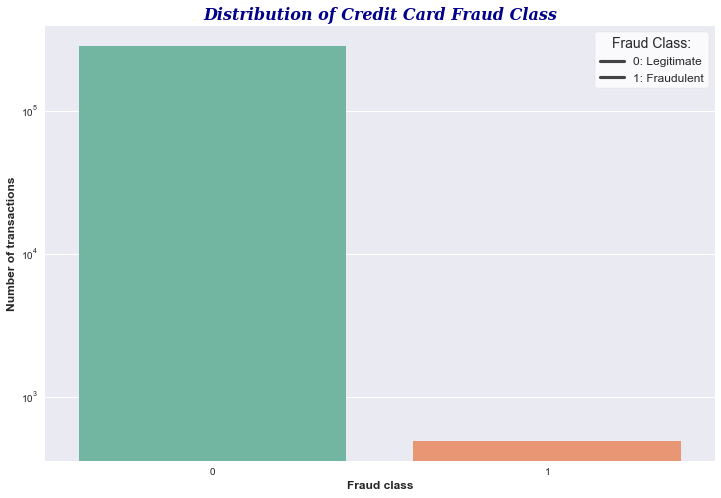

In [8]:
# Plotting a barchart to see the the distribution of the credit card fraud cases
plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}
font3 = {'weight': 'normal', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(class_proportion.index, class_proportion.values, palette='Set2')
ax.set_title('Distribution of Credit Card Fraud Class', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Number of transactions', fontdict=font2)
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels=['0: Legitimate', '1: Fraudulent'], prop= font3, 
          title ='Fraud Class:', title_fontsize=14,
          frameon=True, facecolor='white')
plt.show()

In [9]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [9]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
# Undersampling
# Build a sample dataset containing the similar distribution of the normal transactions and Fraudulent Transactions

legit_sample = legit.sample(n=492)

In [15]:
new_df= pd.concat([legit_sample, fraud], axis = 0)

In [16]:
new_df.shape


(984, 31)

In [20]:
X = new_df.drop(columns=(['Class']))
Y = new_df['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [22]:
sm = SMOTE(sampling_strategy='auto', random_state=3, k_neighbors=5)
X_oversampled , y_oversampled = sm.fit_resample(X, y)

In [23]:
unique_original, counts_original = np.unique(y, return_counts=True)
unique_oversampled, counts_oversampled = np.unique(y_oversampled, return_counts=True)

print('Original fraud class distribution:', dict(zip(unique_original, counts_original)))
print('New transformed fraud class distribution:',dict(zip(unique_oversampled, counts_oversampled)))

Original fraud class distribution: {0: 492, 1: 492}
New transformed fraud class distribution: {0: 492, 1: 492}


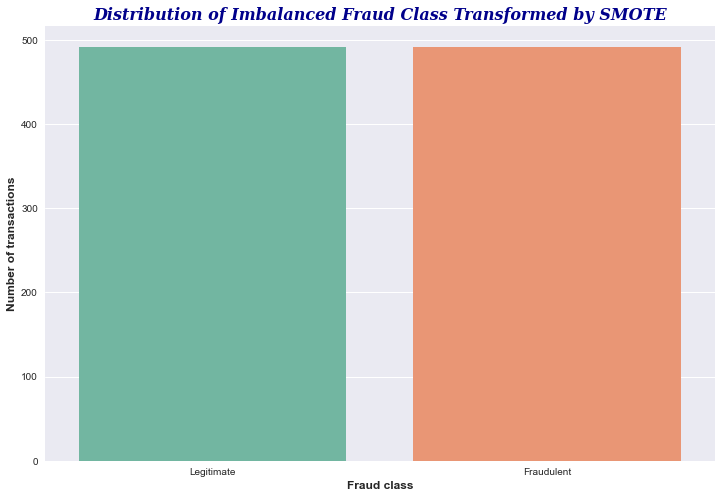

In [24]:
plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y_oversampled, palette='Set2', ax=ax)
ax.set_title('Distribution of Imbalanced Fraud Class Transformed by SMOTE', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_xticklabels(['Legitimate', 'Fraudulent'])
ax.set_ylabel('Number of transactions', fontdict=font2)
plt.show()

In [25]:
# Separate the transformed features matrix and target vector into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=3)

In [26]:
# Instantiate and fit the model
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=150)

In [28]:
# Model Evalution -classification accuracy
training_rfc_accuracy = rfc.score(X_train, y_train)
testing_rfc_accuracy = rfc.score(X_test, y_test)

print("Training RFC Accuracy:", training_rfc_accuracy)
print("Testing RFC Accuracy:", testing_rfc_accuracy )

Training RFC Accuracy: 1.0
Testing RFC Accuracy: 0.959349593495935


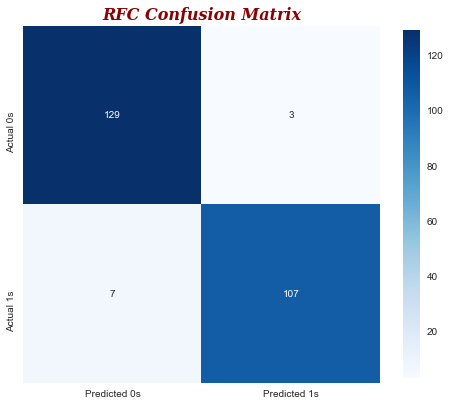

In [29]:
# Plotting the confusion matrix 
fig, ax = plt.subplots(figsize=(8, 8))
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkRed'}
font2 = {'weight': 'bold', 'size': 12}

sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), 
            cmap='Blues', 
            square=True,
            annot=True,
            fmt='d',
            cbar_kws={'shrink': 0.8},
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
ax.set_title('RFC Confusion Matrix', fontdict=font1)
plt.show()

In [30]:
# Model evaluation - Sensitivity, Specificity and Precision 

TN, FP, FN, TP = confusion_matrix(y_test, rfc.predict(X_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 129
False Positives: 3
False Negatives: 7
True Positives: 107

Sensitivity: 0.9385964912280702
Specificity: 0.9772727272727273
Precision: 0.9727272727272728


In [31]:
testing_probabilities= rfc.predict_proba(X_test)
testing_probabilities

array([[0.95333333, 0.04666667],
       [0.        , 1.        ],
       [0.78      , 0.22      ],
       [0.        , 1.        ],
       [0.76      , 0.24      ],
       [0.03333333, 0.96666667],
       [0.84      , 0.16      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.99333333, 0.00666667],
       [0.66666667, 0.33333333],
       [0.12      , 0.88      ],
       [0.02666667, 0.97333333],
       [0.        , 1.        ],
       [0.73333333, 0.26666667],
       [0.01333333, 0.98666667],
       [0.00666667, 0.99333333],
       [0.94      , 0.06      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01333333, 0.98666667],
       [0.04      , 0.96      ],
       [0.78666667, 0.21333333],
       [0.00666667, 0.99333333],
       [0.74666667, 0.25333333],
       [0.86      , 0.14      ],
       [0.99333333, 0.00666667],
       [0.        , 1.        ],
       [0.61333333, 0.38666667],
       [0.

In [32]:
# Convert the testing probabilities into a dataframe
testing_probabilities_df = pd.DataFrame(testing_probabilities, columns=['1 - 𝑝(X_test)', '𝑝(X_test)'])
testing_probabilities_df.head()


,1 - 𝑝(X_test),𝑝(X_test)
0,0.953333,0.046667
1,0.000000,1.000000
2,0.780000,0.220000
3,0.000000,1.000000
4,0.760000,0.240000


In [33]:
# Get predictions
rfc.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0], dtype=int64)

In [34]:
# Model evaluation -AUC
# Calculate AUC for both training and testing subsets
# Only probabilities being in the positive class is needed for the calculation, that is the second column
training_rfc_AUC = roc_auc_score(y_train, rfc.predict_proba(X_train)[:, 1]) 
testing_rfc_AUC = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

print("Training RFC AUC:", training_rfc_AUC)
print("Testing RFC AUC:", testing_rfc_AUC)


Training RFC AUC: 1.0
Testing RFC AUC: 0.9867424242424242


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=3)

In [36]:
# define dictionary of hyperparameters
params = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01, 10, 50, 100],
          'class_weight': [None, 'balanced']}

In [37]:
# Instantiate Logistic Regression model. N.B: the default solver doesn't support l1 regularization
# Instantiate Grid Search to find the best hyperparameters and fit the model
lgr = LogisticRegression(solver='liblinear')
gs = GridSearchCV(lgr, params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 10, 50, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [38]:
# Model evaluation - accuracy 
training_lgr_accuracy = gs.score(X_train, y_train)
testing_lgr_accuracy = gs.score(X_test, y_test)

print("Training LGR Accuracy:", training_lgr_accuracy)
print("Testing LGR Accuracy:", testing_lgr_accuracy)

Training LGR Accuracy: 0.9471544715447154
Testing LGR Accuracy: 0.9634146341463414


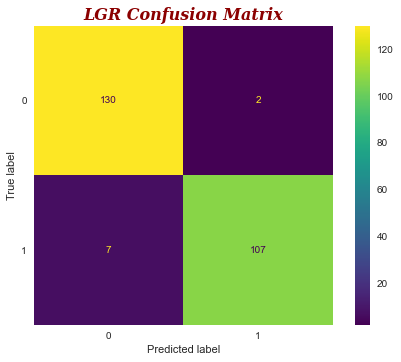

In [39]:
# Plotting the confusion matrix 
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkRed'}

plot_confusion_matrix(gs, X_test, y_test, values_format='d')
plt.title('LGR Confusion Matrix', fontdict=font1)
plt.grid(False)
plt.show()


In [40]:
# Model evaluation - Sensitivity, Specificity and Precision 
TN, FP, FN, TP = confusion_matrix(y_test, gs.predict(X_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 130
False Positives: 2
False Negatives: 7
True Positives: 107

Sensitivity: 0.9385964912280702
Specificity: 0.9848484848484849
Precision: 0.981651376146789


In [41]:
# Model evaluation -AUC
# Calculate AUC for both training and testing subsets
# Only probabilities being in the positive class is needed for the calculation, that is the second column
training_lgr_AUC = roc_auc_score(y_train, gs.predict_proba(X_train)[:, 1]) 
testing_lgr_AUC = roc_auc_score(y_test, gs.predict_proba(X_test)[:, 1])

print("Training LGR AUC:", training_lgr_AUC)
print("Testing LGR AUC:", testing_lgr_AUC)

Training LGR AUC: 0.9901748971193416
Testing LGR AUC: 0.9852472089314194


In [42]:
# Separate the transformed features matrix and target vector into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=3)

In [43]:
# Instantiate and fit the model
gbc = GradientBoostingClassifier(n_estimators=150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=150)

In [44]:
# Model evaluation - accuracy 
training_gbc_accuracy = gbc.score(X_train, y_train)
testing_gbc_accuracy = gbc.score(X_test, y_test)

print("Training GBC Accuracy:", training_gbc_accuracy)
print("Testing GBC Accuracy:", testing_gbc_accuracy)

Training GBC Accuracy: 1.0
Testing GBC Accuracy: 0.9552845528455285


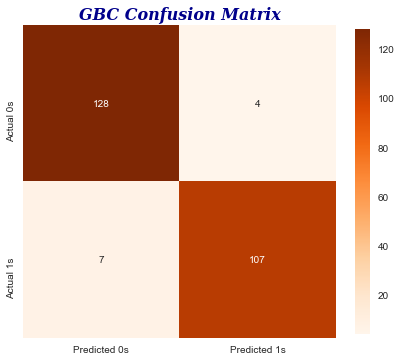

In [45]:
# Plotting the confusion matrix for Gradient Boosting 
fig, ax = plt.subplots(figsize=(7, 7))
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

sns.heatmap(confusion_matrix(y_test, gbc.predict(X_test)), 
            cmap='Oranges', 
            square=True,
            annot=True,
            fmt='d',
            cbar_kws={'shrink': 0.8},
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
ax.set_title('GBC Confusion Matrix', fontdict=font1)
plt.show()

In [46]:
# Model evaluation - Sensitivity, Specificity and Precision 
TN, FP, FN, TP = confusion_matrix(y_test, gbc.predict(X_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 128
False Positives: 4
False Negatives: 7
True Positives: 107

Sensitivity: 0.9385964912280702
Specificity: 0.9696969696969697
Precision: 0.963963963963964


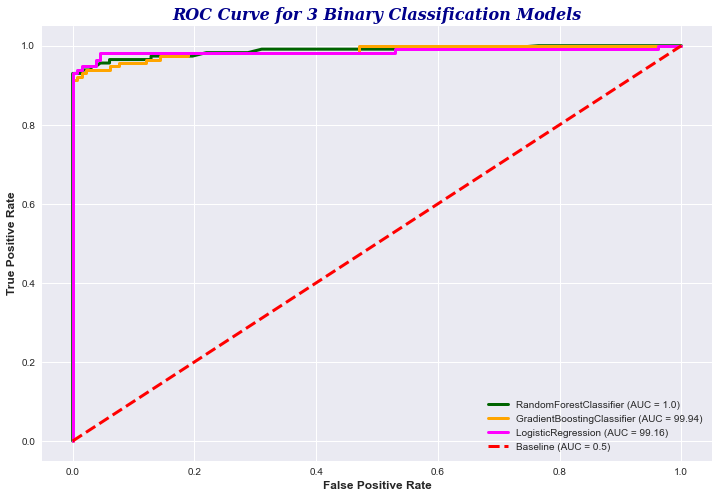

In [47]:
# Visualize the ROC curve 
plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(rfc, X_test, y_test, color='darkgreen', linewidth=3, ax=ax, label='RandomForestClassifier (AUC = 1.0)')
plot_roc_curve(gbc, X_test, y_test, color='orange', linewidth=3, ax=ax, label='GradientBoostingClassifier (AUC = 99.94)')
plot_roc_curve(gs, X_test, y_test, color='magenta', linewidth=3, ax=ax, label='LogisticRegression (AUC = 99.16)')
plt.plot([0, 1], [0, 1], ls='--', color='red', linewidth=3, label='Baseline (AUC = 0.5)')
ax.legend(loc='lower right')
ax.set_title('ROC Curve for 3 Binary Classification Models', fontdict=font1)
ax.set_xlabel('False Positive Rate', fontdict=font2)
ax.set_ylabel('True Positive Rate', fontdict=font2)
plt.show()


#Conclusion
Having evaluated the performance of each of our classification models using the metric accuracy, below are the values I have got:

Random Forest training accuracy: 100%
Random Forest testing accuracy: ~99.99%
Logistic Regression training accuracy: ~95.86%
Logistic Regression testing accuracy: ~95.77%
Gradient Boosting training accuracy: ~98.87%
Gradient Boosting testing accuracy: ~98.83%
XGBoost training accuracy: ~100%
XGBoost testing accuracy: ~99.98
N.B: The model baseline accuracy is 99.80%.

From the aforelisted accuracy values, we can see that all of the four models are not overfit, which is an indication of well-performing models. Nevertheless, in this case our goal is to have a model which which is set to beat the model baseline accuracy of 99.80% on previously unseen data. So, by comparing testing accuracy values of each model to the model baseline accuracy, we can observe that Random Forest and eXtreme Gradient Boosting models have higher accuracy values than that of the model baseline which is assumed to be predicting every transaction to be non-fraudulent whatever input data is being fed in. Plus, Random Forest Classifier seems to be performing better on unseen data as it has slightly higher testing accuracy value.

In conclusion, an ideally perfect credit card fraud detection model will have a zero negative rate and a very low positive rate because it is obvious that cases of fraud escaping detection are more harmful than the cases being falsely flagged as fraud. To put it simply, a false negative is very costly and a false positive is not so much costly. Because of the growing fraud risks, financial institutions sometimes tend to implement overly aggressive fraud detection algorith that flags every single transaction as potentially fraudulent, resulting in high false positive rates. This means legitimate users and bona-fide transactions are being blocked wrongly, leading to a loss of profit and a reputational hit. So, it is also important to note that a seamless user experience is very essential for digital channels because people always consider a good customer experience to be crucial for their loyalty to our service. Putting this tradeoff into consideration, we should develop a model that effectively filters transactions and improves the crux of our businesses while at the same time keeping our customers happy.